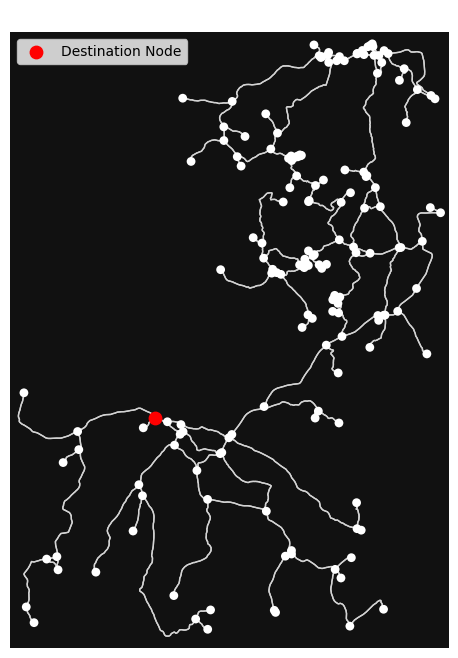

In [29]:
import osmnx as ox
from geopy.distance import geodesic
import matplotlib.pyplot as plt
%matplotlib inline

# Get CMU-Africa coordinates (approximate)
latitude = 1.935111
longitude = 30.158601

# Download the street network within 20 km radius
road = ox.graph_from_point((latitude, longitude), dist=5000, network_type='drive')

# Find the nearest node to the coordinates
nearest_node = ox.distance.nearest_nodes(road, longitude, latitude)

# Get its attributes
destination_node = road.nodes[nearest_node]

# Plot the road network
fig, ax = ox.plot_graph(road, show=False, close=False, node_color='white', node_size=40, edge_color='lightgray')

# Highlight the destination node in red
x, y = destination_node['x'], destination_node['y']
ax.scatter(x, y, c='red', s=80, label='Destination Node', zorder=5)

# Add legend
plt.legend()
plt.title("Road Network with Highlighted Destination Node", color='white')
plt.show()


Getting the start node (First case: chosen arbitralily)

In [30]:
#Current location node
first_node_id = list(road.nodes)[0]
start_node = road.nodes[first_node_id]
print(f"Attributes for node {first_node_id}:")
print(start_node)

Attributes for node 3384369678:
{'y': 1.9784588, 'x': 30.1895121, 'street_count': 3}


Get the destination node (CMU Africa)

In [31]:
# Find the nearest node to CMU-Africa coordinates
# Destination node
nearest_node = ox.distance.nearest_nodes(road, longitude, latitude)

# Get its attributes (including osmid)
destination_node = road.nodes[nearest_node]

print(f"Nearest node ID: {nearest_node}")
print("Node attributes:")
print(destination_node)

Nearest node ID: 6368500381
Node attributes:
{'y': 1.9230563, 'x': 30.1587099, 'street_count': 3}


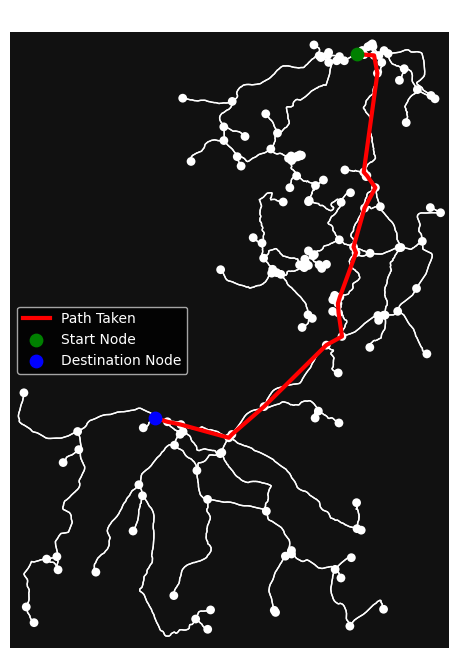

In [35]:
destination_node = ox.distance.nearest_nodes(road, longitude, latitude)
# Assume you're starting from another nearby location
start_latitude = 1.9784
start_longitude = 30.1895
start_node = ox.distance.nearest_nodes(road, start_longitude, start_latitude)

# Compute the shortest path between start and destination
path = ox.routing.shortest_path(road, [start_node], [destination_node], weight='length')[0]

# Plot the graph with default settings
fig, ax = ox.plot_graph(road, show=False, close=False, node_color='white', edge_color='white', node_size=40)

# Extract x and y coordinates of the nodes along the path
x = [road.nodes[n]['x'] for n in path]
y = [road.nodes[n]['y'] for n in path]

# Highlight the path edges in red
ax.plot(x, y, color='red', linewidth=3, label='Path Taken', zorder=4)

# Highlight start and destination nodes
ax.scatter(road.nodes[start_node]['x'], road.nodes[start_node]['y'], c='green', s=80, label='Start Node', zorder=5)
ax.scatter(road.nodes[destination_node]['x'], road.nodes[destination_node]['y'], c='blue', s=80, label='Destination Node', zorder=5)

# Style and show the plot
plt.style.use('dark_background')
plt.legend()
plt.title("Shortest Path from Start to Destination", color='white')
plt.show()

Calculating the straight line distance from the start node to the destination node

In [33]:
# Get coordinates for start node
start_coords = (start_node['y'], start_node['x'])  # (latitude, longitude)

# Get coordinates for destination node
dest_coords = (destination_node['y'], destination_node['x'])  # (latitude, longitude)

# Calculate the geodesic distance
distance = geodesic(start_coords, dest_coords).meters  # or .miles, .meters

print(f"Distance between nodes: {distance:.2f} m")

TypeError: 'int' object is not subscriptable

Neighbouring nodes of the start node

In [ ]:
outgoing_neighbors = list(road.neighbors(first_node_id))
print(f"Outgoing neighbors of node {first_node_id}: {outgoing_neighbors}")

edges_of_node = road.edges(first_node_id, data=True)
print(f"\nEdges from node {first_node_id}:")
for u, v, data in edges_of_node:
    print(f"  Connected to node {v} via edge with attributes: {data}")

Outgoing neighbors of node 3384369678: [6943837966, 7154463780, 6943837935]

Edges from node 3384369678:
  Connected to node 6943837966 via edge with attributes: {'osmid': 1300206437, 'highway': 'unclassified', 'oneway': False, 'reversed': True, 'length': np.float64(10.034862931688611)}
  Connected to node 7154463780 via edge with attributes: {'osmid': 741763588, 'highway': 'unclassified', 'oneway': False, 'reversed': False, 'length': np.float64(120.82971192077137), 'geometry': <LINESTRING (30.19 1.978, 30.19 1.978, 30.19 1.978, 30.19 1.978, 30.19 1.978...>}
  Connected to node 6943837935 via edge with attributes: {'osmid': 1300206437, 'highway': 'unclassified', 'oneway': False, 'reversed': False, 'length': np.float64(243.80348235571867), 'geometry': <LINESTRING (30.19 1.978, 30.189 1.978, 30.188 1.978, 30.188 1.978, 30.188 1...>}


Choosing the best next node